In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
from change_detection import *
from dateutil.relativedelta import relativedelta

# Cerazette

In [2]:
q='''
SELECT
  month,
  practice,
  SUM(IF(SUBSTR(bnf_code,1,11)='0703021Q0BB',
      items,
      0)) AS numerator,
  SUM(items) AS denominator
FROM
  ebmdatalab.hscic.normalised_prescribing_standard
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  practice = prac.code
  AND setting = 4
WHERE
  bnf_code LIKE '0703021Q0%'
  AND
  month < "2016-01-01"
GROUP BY
  practice,
  month
ORDER BY
  practice,
  month
'''
prac_data_cerazette = bq.cached_read(q, csv_path='cerazette.zip')
prac_data_cerazette = prac_data_cerazette.sort_values(['practice','month'])
prac_data_cerazette['calc_value'] = prac_data_cerazette['numerator'] / prac_data_cerazette['denominator']
prac_data_cerazette = prac_data_cerazette.drop(columns=['numerator','denominator'])
prac_data_cerazette['practice'] = 'ratio_quantity.' + prac_data_cerazette['practice'].astype(str)
#prac_data_cerazette = prac_data_cerazette.head(12400)
prac_data_cerazette = prac_data_cerazette.set_index(['month','practice']).unstack().reset_index(col_level=1)
prac_data_cerazette.columns = prac_data_cerazette.columns.droplevel()
prac_data_cerazette['month'] = pd.to_datetime(prac_data_cerazette['month'])
prac_data_cerazette = prac_data_cerazette.set_index('month')
mask_c = prac_data_cerazette.isna().sum() < len(prac_data_cerazette)/2
prac_data_cerazette = prac_data_cerazette[prac_data_cerazette.columns[mask_c]]
## drop cols with all identical values (just one instance found)
cols = prac_data_cerazette.select_dtypes([np.number]).columns
std = prac_data_cerazette[cols].std()
cols_to_drop = std[std==0].index
prac_data_cerazette = prac_data_cerazette.drop(cols_to_drop, axis=1)
prac_data_cerazette.head()

C:\Users\ajwalker\Anaconda3\lib\site-packages\pandas\io\gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


practice,ratio_quantity.A81001,ratio_quantity.A81002,ratio_quantity.A81003,ratio_quantity.A81004,ratio_quantity.A81005,ratio_quantity.A81006,ratio_quantity.A81007,ratio_quantity.A81008,ratio_quantity.A81009,ratio_quantity.A81011,...,ratio_quantity.Y03587,ratio_quantity.Y03595,ratio_quantity.Y03597,ratio_quantity.Y03602,ratio_quantity.Y03656,ratio_quantity.Y03661,ratio_quantity.Y03663,ratio_quantity.Y03664,ratio_quantity.Y03671,ratio_quantity.Y03755
month,,,,,,,,,,,,,,,,,,,,,
2010-08-01,1.0,0.600000,1.0,1.000000,1.000000,0.950820,0.928571,0.833333,1.0,0.875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-01,1.0,0.655738,1.0,0.941176,1.000000,0.968750,0.629630,1.000000,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-01,1.0,0.568627,1.0,1.000000,1.000000,0.923077,0.777778,0.200000,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-01,1.0,0.688889,1.0,1.000000,1.000000,1.000000,0.555556,1.000000,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-01,1.0,0.754098,NaN,1.000000,0.933333,1.000000,0.500000,0.800000,1.0,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
x = ChangeDetection(name='desogestrel_measure',
                    verbose=False,
                    direction='down')
#x.run()

In [4]:
practice_cerazette = pd.read_csv('data/desogestrel_measure/r_output.csv')
practice_cerazette = practice_cerazette.replace([np.inf, -np.inf], np.nan)
practice_cerazette.head()

,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,A81001,2,46.0,46.0,46.0,46.0,46.0,-0.081600,-0.090631,0.562657,0.981948,0.401846,0.580102,0.590767
1,A81002,2,42.0,42.0,42.0,42.0,42.0,-0.478759,-2.844392,0.839145,0.647076,0.076544,0.570532,0.881708
2,A81003,1,41.0,41.0,41.0,41.0,41.0,-0.036546,-0.040380,0.520000,0.941602,0.064500,0.877102,0.931500
3,A81004,3,40.0,40.0,40.0,40.0,40.0,-0.096405,-0.110674,0.522166,0.967481,0.044352,0.923130,0.954158
4,A81005,1,40.0,40.0,40.0,40.0,40.0,-0.034794,-0.036432,0.538462,0.989830,0.085181,0.904649,0.913944


In [5]:
practice_deciles_cer = pd.DataFrame(prac_data_cerazette.stack(),columns=['calc_value']).reset_index(level=0)
x1 = np.arange(0.1, 1, 0.1)
x2 = np.arange(0.01,0.1,0.01)
x3 = np.arange(0.91, 1, 0.01)
x = np.concatenate((x1,x2,x3))
#practice_deciles_cer['month'] = pd.to_datetime(practice_deciles_cer['month'])
practice_deciles_cer = practice_deciles_cer.groupby('month').quantile(x)
practice_deciles_cer = practice_deciles_cer.reset_index(level=1)
#practice_deciles_cer['level_1'] = practice_deciles_cer['level_1']*100

practice_deciles_cer = practice_deciles_cer.set_index(['level_1'], append=True)
practice_deciles_cer = practice_deciles_cer.unstack(level=1)
practice_deciles_cer.columns = practice_deciles_cer.columns.droplevel()

practice_deciles_cer.index = pd.to_datetime(practice_deciles_cer.index)
practice_deciles_cer.head()

level_1,0.01,0.02,0.03,0.04,0.05,0.060000000000000005,0.06999999999999999,0.08,0.09,0.1,...,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.9600000000000001,0.9700000000000001,0.9800000000000001,0.9900000000000001
month,,,,,,,,,,,,,,,,,,,,,
2010-08-01,0.0,0.0,0.0,0.0,0.0,0.062500,0.105263,0.138889,0.166667,0.187500,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-09-01,0.0,0.0,0.0,0.0,0.0,0.066667,0.103448,0.137555,0.166667,0.198537,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-10-01,0.0,0.0,0.0,0.0,0.0,0.066083,0.111111,0.142857,0.166667,0.200000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-11-01,0.0,0.0,0.0,0.0,0.0,0.000000,0.062500,0.111111,0.143492,0.176471,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2010-12-01,0.0,0.0,0.0,0.0,0.0,0.000000,0.083333,0.125000,0.166667,0.187500,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
offset_date = practice_cerazette['is.tfirst.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks_cer = practice_deciles_cer.index.min() + offset_date
#practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] = practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] + pd.DateOffset(days=1)
practice_breaks_cer.head()

0   2014-05-01
1   2014-01-01
2   2013-12-01
3   2013-11-01
4   2013-11-01
Name: is.tfirst.big, dtype: datetime64[ns]

In [7]:
mean_slope = practice_cerazette[['is.tfirst.big','is.slope.ma']]
mean_slope = mean_slope.groupby('is.tfirst.big').mean()
mean_slope = pd.concat([mean_slope,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope = mean_slope.sort_index()
mean_slope.head()#.plot.bar()

,is.slope.ma
0.0,0.000000
2.0,-0.051369
3.0,-0.027411
4.0,-0.080827
5.0,-0.075022


In [8]:
mean_change = practice_cerazette[['is.tfirst.big','is.intlev.levd']]
mean_change = mean_change.groupby('is.tfirst.big').mean()
mean_change = pd.concat([mean_change,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change = mean_change.sort_index()
mean_change.head()#.plot.bar()

,is.intlev.levd
0.0,0.000000
2.0,0.421692
3.0,0.483127
4.0,0.508706
5.0,0.509531


C:\Users\ajwalker\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


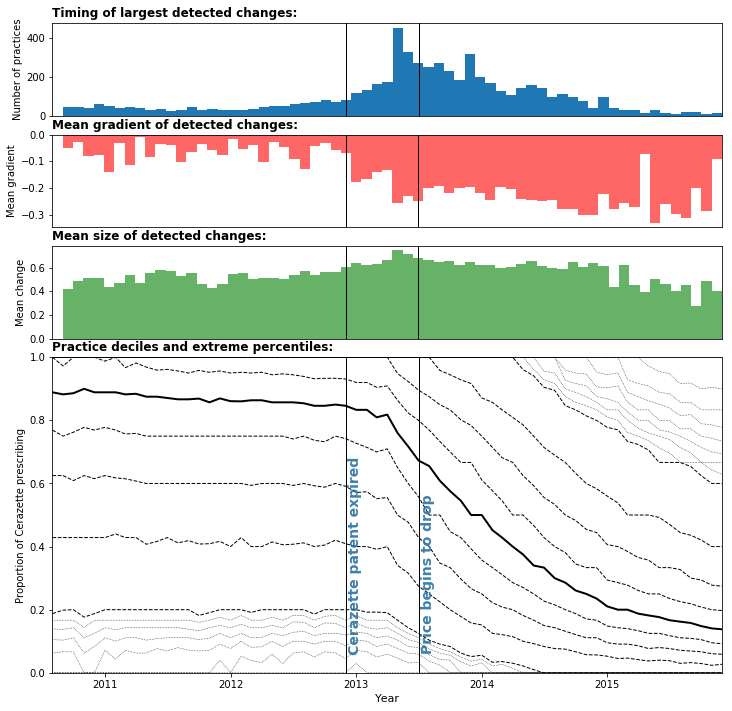

In [9]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot
ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
ax.set_title('Practice deciles and extreme percentiles:',loc='left',fontweight='bold')
ax.set_ylabel('Proportion of Cerazette prescribing')
ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
ax.set_xlabel('Year', fontsize = 11)
ax.set_ylim([0,1])
for decile in x:   # plot each decile/centile line
    data = practice_deciles_cer[decile]
    if decile == .5:
        ax.plot(data,'k-',linewidth=2,label='')
    elif (decile <0.1) | (decile >0.9):
        ax.plot(data,'k:',linewidth=0.6,label='')
    else:
        ax.plot(data,'k--',linewidth=1,label='')
ax.axvline(x='2012-12-01',linewidth=1, color='k')
ax.axvline(x='2013-07-01',linewidth=1, color='k')
ax.annotate('Cerazette patent expired', ('2012-12-08',0.65),
            fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)
ax.annotate('Price begins to drop', ('2013-07-08',0.53),
            fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)

# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
ax.set_xticks([])
ax.hist(practice_breaks_cer, bins=64)
ax.axvline(x='2012-12-01',linewidth=1, color='k')
ax.axvline(x='2013-07-01',linewidth=1, color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_slope.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
ax.axvline(x=28,linewidth=1, color='k')
ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
mean_change.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
ax.axvline(x=28,linewidth=1, color='k')
ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('data/desogestrel_measure/cerazette_deciles.png',
            format='png', dpi=300,bbox_inches='tight')

In [10]:
practice_breaks_cer.quantile(.5)

Timestamp('2013-08-01 00:00:00')

In [11]:
practice_breaks_cer.quantile(.25)

Timestamp('2013-02-01 00:00:00')

In [12]:
practice_breaks_cer.quantile(.9)

Timestamp('2014-09-01 00:00:00')

In [13]:
(practice_cerazette['is.tfirst.big']-29).describe()

count    6054.000000
mean        6.655104
std        12.526541
min       -27.000000
25%         2.000000
50%         8.000000
75%        14.000000
max        36.000000
Name: is.tfirst.big, dtype: float64

In [14]:
practice_cerazette['is.slope.ma'].describe()

count    6054.000000
mean       -0.186922
std         0.242034
min        -1.946610
25%        -0.283527
50%        -0.089006
75%        -0.020358
max         1.166667
Name: is.slope.ma, dtype: float64

In [15]:
practice_cerazette['is.intlev.levd'].describe()

count    5999.000000
mean        0.617448
std         0.275621
min        -0.890487
25%         0.437271
50%         0.659232
75%         0.849757
max         1.087937
Name: is.intlev.levd, dtype: float64

In [16]:
len(practice_cerazette.loc[practice_cerazette['is.nbreak']==0])

1711

## Scatterplot

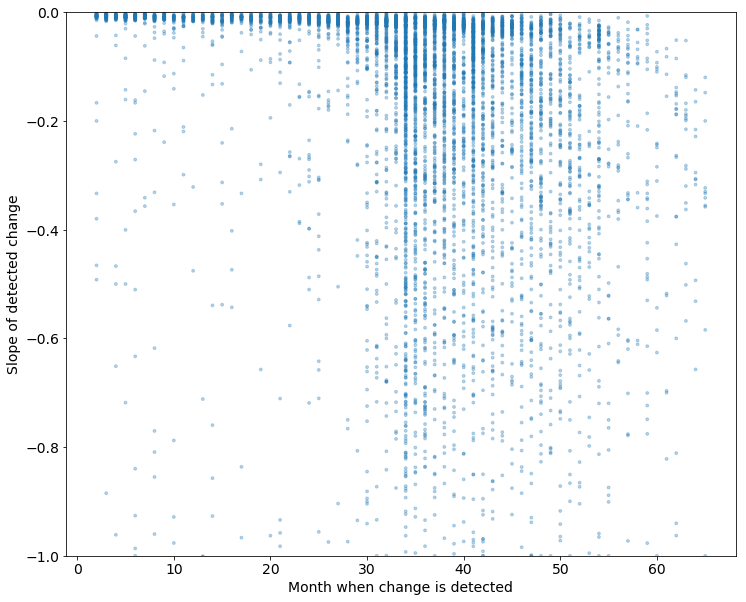

In [17]:
fig,ax = plt.subplots(1)
fig.set_size_inches(w=12,h=10)
#s = (practice_cerazette['is.intlev.levd']**2)*20
s = [8]*len(practice_cerazette)
practice_cerazette.plot.scatter('is.tfirst.big','is.slope.ma',s=s,ax=ax,alpha=0.3)
ax.set_ylim([-1,0])
ax.set_xlabel('Month when change is detected')
ax.set_ylabel('Slope of detected change')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.show()

## Dropped/not dropped list size comparison

In [18]:
q = '''
SELECT
  practice,
  total_list_size
FROM
  ebmdatalab.hscic.practice_statistics_all_years
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  practice = prac.code
  AND setting = 4
WHERE
  month = '2014-01-01'
ORDER BY
  practice
'''
size = bq.cached_read(q, csv_path='cerazette.zip')
size = size.set_index('practice')

C:\Users\ajwalker\Anaconda3\lib\site-packages\pandas\io\gbq.py:149: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  credentials=credentials, verbose=verbose, private_key=private_key)


In [19]:
size.mean()

total_list_size    7078.091309
dtype: float64

In [20]:
dropped = mask_c
dropped.index =dropped.index.map(lambda x: x.lstrip('ratio_quantity.'))
size.groupby(dropped).mean()

,total_list_size
False,1860.628378
True,7196.959317


# Trimethoprim

In [21]:
q='''
SELECT
  month,
  practice,
  SUM(IF(SUBSTR(bnf_code,1,9)='0501080W0',
      items,
      0)) AS numerator,
  SUM(items) AS denominator
FROM
  ebmdatalab.hscic.normalised_prescribing_standard
INNER JOIN
  ebmdatalab.hscic.practices prac
ON
  practice = prac.code
  AND setting = 4
WHERE
  (bnf_code LIKE '0501130R0%'
  OR bnf_code LIKE '0501080W0%')
  AND
  month >= "2013-06-01"
  AND
  month <= "2018-06-01"
GROUP BY
  pct,
  practice,
  month
ORDER BY
  practice,
  month
'''
prac_data = bq.cached_read(q, csv_path='trimethoprim.zip')
prac_data['calc_value'] = prac_data['numerator'] / prac_data['denominator']
prac_data = prac_data.drop(columns=['numerator','denominator'])
prac_data['practice'] = 'ratio_quantity.' + prac_data['practice'].astype(str)
prac_data = prac_data.set_index(['month','practice']).unstack().reset_index(col_level=1)
prac_data.columns = prac_data.columns.droplevel()
prac_data['month'] = pd.to_datetime(prac_data['month'])
prac_data = prac_data.set_index('month')
mask_t = prac_data.isna().sum() < len(prac_data)/2
prac_data = prac_data[prac_data.columns[mask_t]]
prac_data.head()

practice,ratio_quantity.A81001,ratio_quantity.A81002,ratio_quantity.A81003,ratio_quantity.A81004,ratio_quantity.A81005,ratio_quantity.A81006,ratio_quantity.A81007,ratio_quantity.A81008,ratio_quantity.A81009,ratio_quantity.A81011,...,ratio_quantity.Y05088,ratio_quantity.Y05125,ratio_quantity.Y05161,ratio_quantity.Y05162,ratio_quantity.Y05167,ratio_quantity.Y05187,ratio_quantity.Y05190,ratio_quantity.Y05212,ratio_quantity.Y05248,ratio_quantity.Y05258
month,,,,,,,,,,,,,,,,,,,,,
2013-06-01,0.853659,0.672515,0.666667,0.662651,0.644231,0.522059,0.616822,0.870968,0.808219,0.783019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-01,0.760870,0.643836,0.666667,0.671642,0.505747,0.483696,0.635593,0.758621,0.775000,0.680672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01,0.765957,0.666667,0.629630,0.780822,0.544643,0.487013,0.628571,0.619048,0.722892,0.756522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-01,0.730769,0.666667,0.531250,0.605634,0.712963,0.524138,0.633929,0.812500,0.752809,0.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-01,0.696429,0.689266,0.717949,0.747368,0.674797,0.503356,0.620370,0.760000,0.728972,0.752475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.options.display.max_rows = 100
x = ChangeDetection(name='trimethoprim_measure',
                    verbose=False,
                    direction='down')
#x.run()

In [23]:
practice = pd.read_csv('data/trimethoprim_measure/r_output.csv')
practice = practice.replace([np.inf, -np.inf], np.nan)
practice.head()

,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,A81001,2,45.0,45.0,NaN,NaN,45.0,-0.377109,-1.014628,1.000652,0.748780,0.371917,0.376863,0.503302
1,A81002,2,49.0,49.0,NaN,NaN,49.0,-0.197573,-0.435619,0.595645,0.651117,0.319422,0.331695,0.509425
2,A81003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A81004,2,48.0,48.0,NaN,NaN,48.0,-0.111683,-0.201516,0.578084,0.665898,0.279506,0.386391,0.580257
4,A81005,2,47.0,47.0,47.0,47.0,47.0,-0.062706,-0.125461,0.609689,0.562508,0.253962,0.308547,0.548519


In [24]:
pd.set_option("display.max_columns",101)

In [25]:
practice_deciles = pd.DataFrame(prac_data.stack(),columns=['calc_value']).reset_index(level=0)
x1 = np.arange(0.1, 1, 0.1)
x2 = np.arange(0.01,0.1,0.01)
x3 = np.arange(0.91, 1, 0.01)
x = np.concatenate((x1,x2,x3))
#practice_deciles['month'] = pd.to_datetime(practice_deciles['month'])
practice_deciles = practice_deciles.groupby('month').quantile(x)
practice_deciles = practice_deciles.reset_index(level=1)
#practice_deciles['level_1'] = practice_deciles['level_1']*100

practice_deciles = practice_deciles.set_index(['level_1'], append=True)
practice_deciles = practice_deciles.unstack(level=1)
practice_deciles.columns = practice_deciles.columns.droplevel()

practice_deciles.index = pd.to_datetime(practice_deciles.index)
practice_deciles.head()

level_1,0.01,0.02,0.03,0.04,0.05,0.060000000000000005,0.06999999999999999,0.08,0.09,0.1,0.2,0.30000000000000004,0.4,0.5,0.6,0.7000000000000001,0.8,0.9,0.91,0.92,0.93,0.9400000000000001,0.9500000000000001,0.9600000000000001,0.9700000000000001,0.9800000000000001,0.9900000000000001
month,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-01,0.197217,0.265077,0.307692,0.333333,0.365760,0.384615,0.405097,0.421875,0.440114,0.453192,0.541022,0.595745,0.637931,0.671642,0.706667,0.742454,0.785714,0.846154,0.857143,0.866667,0.875000,0.888889,0.900000,0.916667,0.941176,1.000000,1.0
2013-07-01,0.187854,0.260870,0.305556,0.333333,0.363636,0.390625,0.408163,0.423077,0.440585,0.454545,0.545455,0.600000,0.638889,0.672131,0.706667,0.740741,0.781513,0.842105,0.850000,0.857143,0.866667,0.878049,0.891806,0.909091,0.933333,0.965517,1.0
2013-08-01,0.197643,0.259586,0.303048,0.333333,0.363636,0.387789,0.405128,0.424473,0.440000,0.454545,0.543197,0.593750,0.635426,0.670330,0.704918,0.739130,0.780000,0.839418,0.847212,0.857143,0.868762,0.880000,0.894737,0.911052,0.933333,0.977589,1.0
2013-09-01,0.200000,0.264461,0.300000,0.333333,0.361111,0.384615,0.406250,0.423529,0.440506,0.454545,0.545455,0.600000,0.641304,0.674157,0.708333,0.744681,0.783784,0.840290,0.849315,0.857143,0.869565,0.882353,0.894737,0.909091,0.933178,0.967742,1.0
2013-10-01,0.200000,0.272727,0.318214,0.350000,0.377694,0.400000,0.413793,0.432432,0.444444,0.457143,0.548694,0.603031,0.643057,0.678161,0.710953,0.747126,0.785714,0.842105,0.852313,0.859181,0.869565,0.880000,0.891304,0.908565,0.925000,0.950341,1.0


In [26]:
offset_date = practice['is.tfirst.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks = practice_deciles.index.min() + offset_date
practice_breaks.head()

0   2017-02-01
1   2017-06-01
3   2017-05-01
4   2017-04-01
5   2017-04-01
Name: is.tfirst.big, dtype: datetime64[ns]

In [27]:
mean_slope = practice[['is.tfirst.big','is.slope.ma']]
mean_slope = mean_slope.groupby('is.tfirst.big').mean()
mean_slope = pd.concat([mean_slope,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope = mean_slope.sort_index()
mean_slope.head()

,is.slope.ma
0.0,0.000000
2.0,-0.012614
3.0,-0.021662
4.0,-0.026757
5.0,-0.012954


In [28]:
mean_change = practice[['is.tfirst.big','is.intlev.levd']]
mean_change = mean_change.groupby('is.tfirst.big').mean()
mean_change = pd.concat([mean_change,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change = mean_change.sort_index()
mean_change.head()

,is.intlev.levd
0.0,0.000000
2.0,0.340489
3.0,0.380701
4.0,0.398118
5.0,0.354704


In [29]:
prac_data.index.max()

Timestamp('2018-06-01 00:00:00')

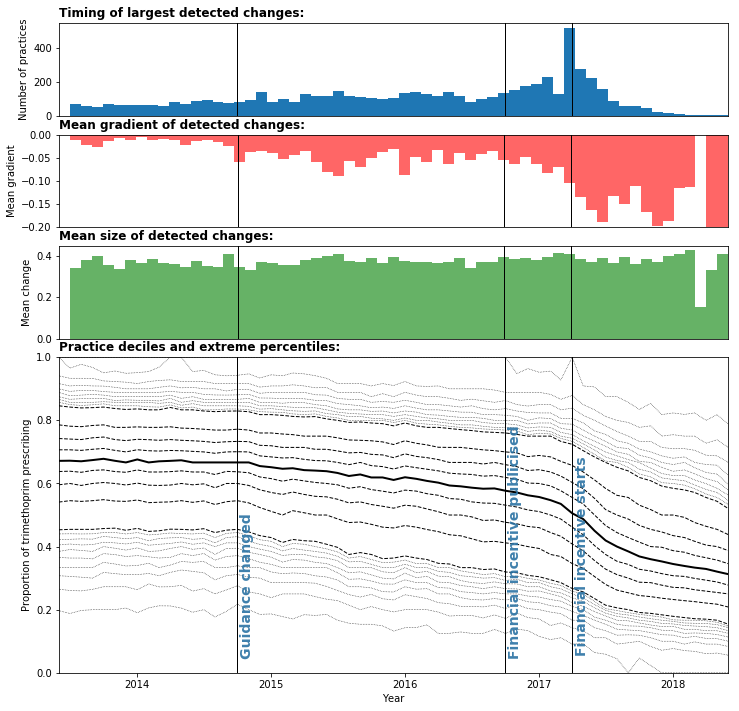

In [30]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot
ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
ax.set_title('Practice deciles and extreme percentiles:',loc='left',fontweight='bold')
ax.set_ylabel('Proportion of trimethoprim prescribing')
ax.set_xlim([practice_deciles.index.min(),practice_deciles.index.max()])
ax.set_xlabel('Year')
ax.set_ylim([0,1])
for decile in x:   # plot each decile/centile line
    data = practice_deciles[decile]
    if decile == .5:
        ax.plot(data,'k-',linewidth=2,label='')
    elif (decile <0.1) | (decile >0.9):
        ax.plot(data,'k:',linewidth=0.6,label='')
    else:
        ax.plot(data,'k--',linewidth=1,label='')
ax.axvline(x='2014-10-01',linewidth=1, color='k')
ax.axvline(x='2016-10-01',linewidth=1, color='k')
ax.axvline(x='2017-04-01',linewidth=1, color='k')

ax.annotate('Guidance changed', ('2014-10-08',0.47),fontweight='bold',
            rotation=90,fontsize=14,color='#2a72a3',alpha=.9)
ax.annotate('Financial incentive publicised', ('2016-10-08',0.75),fontweight='bold',
            rotation=90,fontsize=14,color='#2a72a3',alpha=.9)
ax.annotate('Financial incentive starts', ('2017-04-08',0.65),fontweight='bold',
            rotation=90,fontsize=14,color='#2a72a3',alpha=.9)

# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([practice_deciles.index.min(),practice_deciles.index.max()])
ax.set_xticks([])
ax.hist(practice_breaks, bins=60)
ax.axvline(x='2014-10-01',linewidth=1, color='k')
ax.axvline(x='2016-10-01',linewidth=1, color='k')
ax.axvline(x='2017-04-01', linewidth=1, color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
ax.set_ylim([-0.2,0])
mean_slope.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
ax.axvline(x=15.8,linewidth=1, color='k')
ax.axvline(x=40.1,linewidth=1, color='k')
ax.axvline(x=46.2,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_change.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
ax.axvline(x=15.8,linewidth=1, color='k')
ax.axvline(x=40.1,linewidth=1, color='k')
ax.axvline(x=46.2,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('data/trimethoprim_measure/trimethoprim_deciles.png', format='png', dpi=300,bbox_inches='tight')

In [31]:
practice_breaks.quantile(.5)

Timestamp('2016-04-01 00:00:00')

In [32]:
practice_breaks.quantile(.25)

Timestamp('2015-03-01 00:00:00')

In [33]:
practice_breaks.quantile(.9)

Timestamp('2017-06-01 00:00:00')

In [34]:
from datetime import datetime
practice_breaks.quantile(.9) - datetime.strptime('2014-10-01','%Y-%m-%d')

Timedelta('974 days 00:00:00')

In [35]:
(practice['is.tfirst.big']-17).describe()

count    6265.000000
mean       15.819473
std        14.339663
min       -15.000000
25%         5.000000
50%        18.000000
75%        29.000000
max        44.000000
Name: is.tfirst.big, dtype: float64

In [36]:
practice['is.slope.ma'].describe()

count    6265.000000
mean       -0.068797
std         0.124065
min        -1.105344
25%        -0.074897
50%        -0.020917
75%        -0.009947
max         1.000000
Name: is.slope.ma, dtype: float64

In [37]:
practice['is.intlev.levd'].describe()

count    6253.000000
mean        0.379108
std         0.146829
min        -0.771031
25%         0.284111
50%         0.377162
75%         0.469618
max         0.941200
Name: is.intlev.levd, dtype: float64

In [38]:
len(practice.loc[practice['is.nbreak']==0])

1380

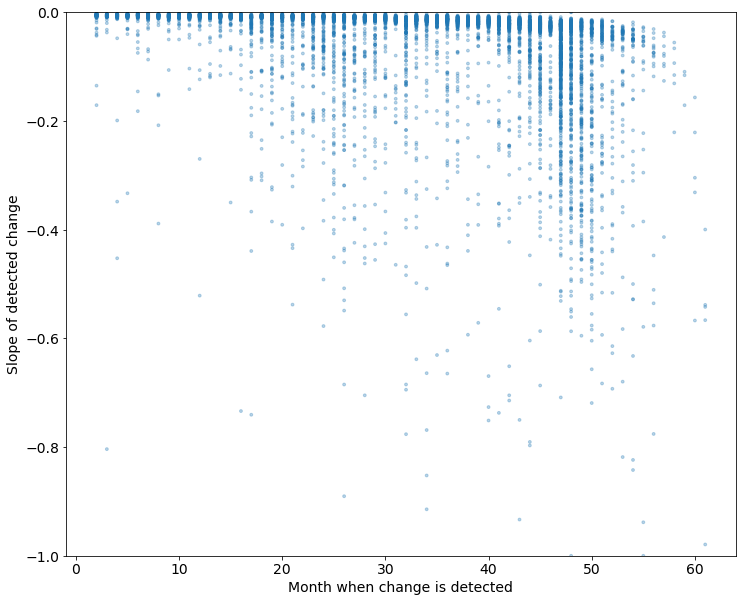

In [39]:
fig,ax = plt.subplots(1)
fig.set_size_inches(w=12,h=10)
#s = (practice_cerazette['is.intlev.levd']**2)*20
s = [8]*len(practice_cerazette)
practice.plot.scatter('is.tfirst.big','is.slope.ma',s=s,ax=ax,alpha=0.3)
ax.set_ylim([-1,0])
ax.set_xlabel('Month when change is detected')
ax.set_ylabel('Slope of detected change')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
plt.show()

In [40]:
dropped = mask_t
dropped.index =dropped.index.map(lambda x: x.lstrip('ratio_quantity.'))
size.groupby(dropped).mean()

,total_list_size
False,3407.868421
True,7235.062778
